# **Importing necessary libraries**

In [66]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# **Creating DataFrame**

In [67]:
X=np.arange(1,11)
Y=[2.1,2.9,4.8,8.2,13.5,21.9,34.4,52.2,76.3,108.9]

In [68]:
df=pd.DataFrame({'X':X,'Y':Y})

In [69]:
df

,X,Y
0,1,2.1
1,2,2.9
2,3,4.8
3,4,8.2
4,5,13.5
5,6,21.9
6,7,34.4
7,8,52.2
8,9,76.3
9,10,108.9


# **Plotting X and Y to see the relationship**

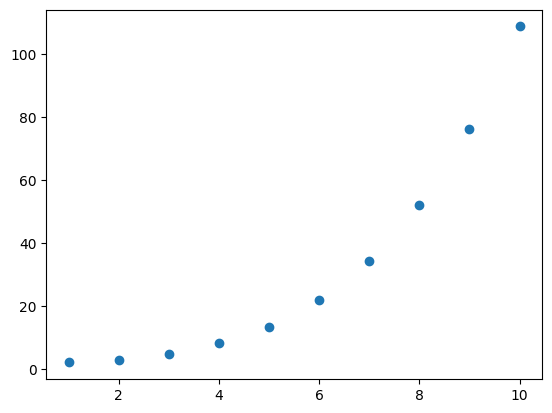

In [70]:
plt.scatter(df['X'],df['Y'])
plt.show()

# **To handle this non-linear pattern , we can use Quadratic Regression , Cubic Regression , Polynomial Regression**

##  Regression Equation Formats

### 🔹 Linear Regression


\[
y = B0 + B1 x
\]



### 🔹 Quadratic Regression


\[
y = B0 + B1 x + B2 x^2
\]



### 🔹 Cubic Regression


\[
y = B0 + B1 x + B2 x^2 + B3 x^3
\]



### 🔹 Polynomial Regression (degree d)


\[
y = B0 + B1 x + B2 x^2 + ...... + Bd x^d
\]





# **Lets use Linear Regression and see how it fitting the data as well as its score**

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()
lr.fit(df[['X']],df['Y'])

LinearRegression()

In [72]:
lr.coef_,lr.intercept_

(array([10.9030303]), np.float64(-27.44666666666668))

In [73]:
print('r2 score when degree is 1: ',r2_score(df['Y'],lr.predict(df[['X']])))

r2 score when degree is 1:  0.8326382077374983


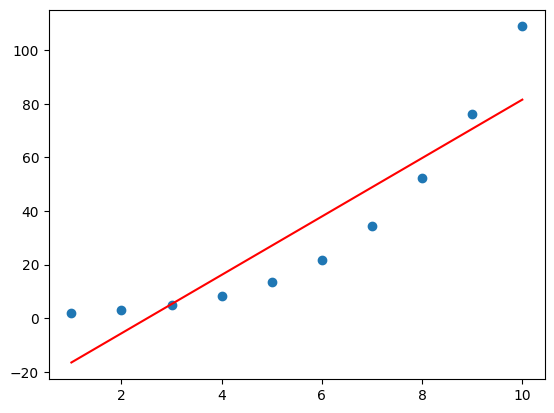

In [74]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],lr.predict(df[['X']]),color='red')
plt.show()

# **Let's use Quadratic Regression and see how it fitting the data as well as its score**

In [75]:
df['X^2']=df['X']**2

In [76]:
lr_quadratic = LinearRegression()
lr_quadratic.fit(df[['X','X^2']], df['Y'])

LinearRegression()

In [77]:
print('R² score for quadratic regression:', r2_score(df['Y'], lr_quadratic.predict(df[['X', 'X^2']])))

R² score for quadratic regression: 0.9921499663790654


# **Let's use cubic Regression and see how it fitting the data as well as its score**

In [78]:
df['X^3']=df['X^2']*2
lr_cubic=LinearRegression()
lr_cubic.fit(df[['X','X^2','X^3']],df['Y'])

LinearRegression()

In [79]:
print('r2 score for cubic regression is: ',r2_score(df['Y'],lr_cubic.predict(df[['X','X^2','X^3']])))

r2 score for cubic regression is:  0.9921499663790654


# **Same score for quadratic and cubic degress , so we can stop adding more degrees after quadratic regression (0.83<0.99)**

# **Plotting Quadratic Regression**

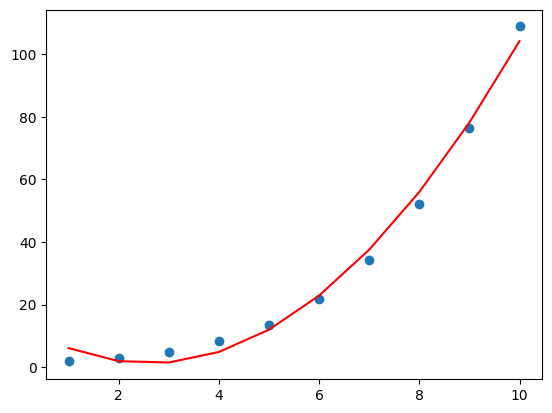

In [80]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],lr_quadratic.predict(df[['X','X^2']]),color='red')
plt.show()

# **Polynomial Regression**

# Dataset link: https://www.kaggle.com/datasets/rutultrivedi/polynomial-regression-sample-dataset

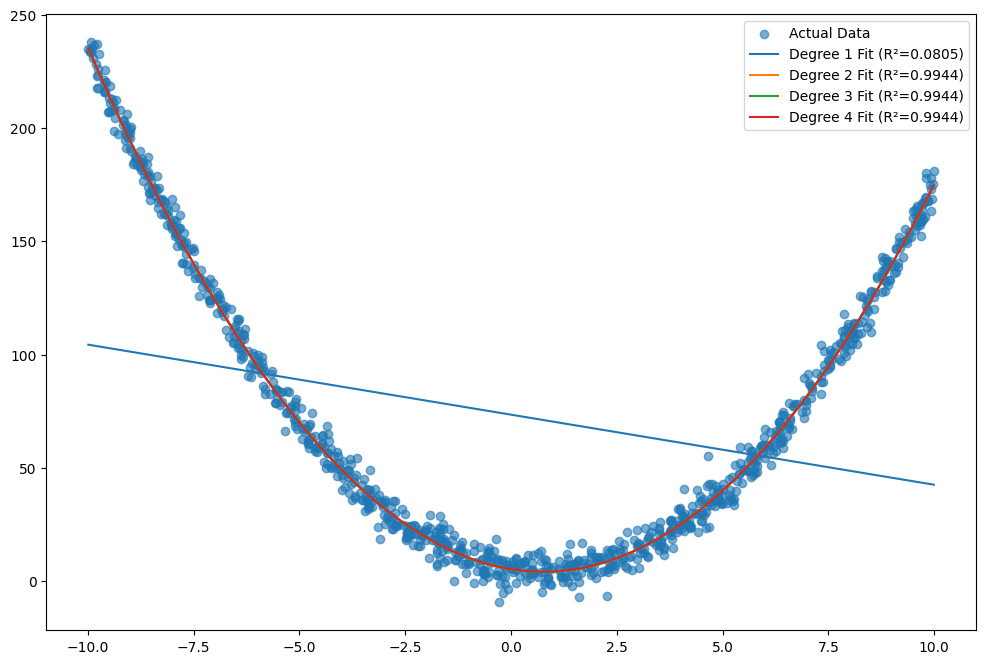

In [81]:
from sklearn.preprocessing import PolynomialFeatures
df2 = pd.read_csv('/content/data.csv')

X = df2[['x']]
y = df2['y']
degrees = [1, 2, 3, 4]


plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Actual Data', alpha=0.6)


for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    x_line = np.linspace(X.min()[0], X.max()[0], 200).reshape(-1, 1)
    x_line_poly = poly.transform(x_line)
    y_line = model.predict(x_line_poly)

    r2 = r2_score(y, model.predict(X_poly))

    plt.plot(x_line, y_line, label=f'Degree {degree} Fit (R²={r2:.4f})')
plt.legend()
plt.show()

# **After changing degree 2 to 3,4,5.... , there is no change in the score , also the line fitted in degree=2**


TO NOTE
*   I used 2d plot to show the line fitting , in actual case , that is not a line , it is a plane in nth dimension





---

